In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
df=pd.read_csv(r"C:\Users\user\Downloads\StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [78]:
df.shape

(1000, 8)

In [79]:
df.describe(include='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


In [80]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

## Data cleaning

### rename race/ethnicity to ethinicity

In [81]:
df.rename(columns={'race/ethnicity':'ethnicity'},inplace=True)

In [82]:
df.head()

,gender,ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### remove spaces in column names

In [83]:
columns=df.columns

In [84]:
column=[col.replace(' ','_') for col in columns]
column

['gender',
 'ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course',
 'math_score',
 'reading_score',
 'writing_score']

In [85]:
df.columns=column

### clean null values if present

In [86]:
df.isnull().sum()

gender                         0
ethnicity                      0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [87]:
df.dropna()
df

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


### explore unique values in categorical columns

In [88]:
print(df['gender'].unique())
print(df['ethnicity'].unique())
print(df['parental_level_of_education'].unique())
print(df['lunch'].unique())
print(df['test_preparation_course'].unique())

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


### fix dtypes of the columns if needed

In [89]:
df.dtypes

gender                         object
ethnicity                      object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

### replace 'none' to 'not completed' in `test preration cource`

In [90]:
df['test_preparation_course']=df['test_preparation_course'].replace('none','not completed')

In [91]:
df

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,not completed,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,not completed,90,95,93
3,male,group A,associate's degree,free/reduced,not completed,47,57,44
4,male,group C,some college,standard,not completed,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,not completed,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


### check duplicate rows

In [92]:
df.duplicated().sum()

0

In [93]:
df.drop_duplicates()

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,not completed,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,not completed,90,95,93
3,male,group A,associate's degree,free/reduced,not completed,47,57,44
4,male,group C,some college,standard,not completed,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,not completed,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


### add new column called `division` which gives studet 'first', 'second', 'third' or fail according to total marks.

In [94]:
df['total_marks']=df.apply(lambda x: x['math_score'] + x['reading_score'] + x['writing_score'],axis=1)

In [95]:
df.head()

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_marks
0,female,group B,bachelor's degree,standard,not completed,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,not completed,90,95,93,278
3,male,group A,associate's degree,free/reduced,not completed,47,57,44,148
4,male,group C,some college,standard,not completed,76,78,75,229


In [96]:
df['division']=df['total_marks'].apply(lambda x: 'First Division' if x>180 else 'Second Division' if x>150  else 'Third Division' if x>90 else 'Fail')

In [97]:
df.division.value_counts()

First Division     707
Second Division    184
Third Division      99
Fail                10
Name: division, dtype: int64

In [98]:
df

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_marks,division
0,female,group B,bachelor's degree,standard,not completed,72,72,74,218,First Division
1,female,group C,some college,standard,completed,69,90,88,247,First Division
2,female,group B,master's degree,standard,not completed,90,95,93,278,First Division
3,male,group A,associate's degree,free/reduced,not completed,47,57,44,148,Third Division
4,male,group C,some college,standard,not completed,76,78,75,229,First Division
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,First Division
996,male,group C,high school,free/reduced,not completed,62,55,55,172,Second Division
997,female,group C,high school,free/reduced,completed,59,71,65,195,First Division
998,female,group D,some college,standard,completed,68,78,77,223,First Division


## EDA

### Average marks of a student in all 3 subjects

In [99]:
df.total_marks.mean()

203.312

###  Which student got the highest marks in total?

In [100]:
print(df.loc[df["total_marks"].idxmax()])

gender                                    female
ethnicity                                group E
parental_level_of_education    bachelor's degree
lunch                                   standard
test_preparation_course            not completed
math_score                                   100
reading_score                                100
writing_score                                100
total_marks                                  300
division                          First Division
Name: 458, dtype: object


In [101]:
df.sort_values(by='total_marks',ascending=False).head()

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_marks,division
916,male,group E,bachelor's degree,standard,completed,100,100,100,300,First Division
458,female,group E,bachelor's degree,standard,not completed,100,100,100,300,First Division
962,female,group E,associate's degree,standard,not completed,100,100,100,300,First Division
114,female,group E,bachelor's degree,standard,completed,99,100,100,299,First Division
179,female,group D,some high school,standard,completed,97,100,100,297,First Division


### which student got the lowest marks in total

In [102]:
print(df.loc[df["total_marks"].idxmin()])

gender                                   female
ethnicity                               group C
parental_level_of_education    some high school
lunch                              free/reduced
test_preparation_course           not completed
math_score                                    0
reading_score                                17
writing_score                                10
total_marks                                  27
division                                   Fail
Name: 59, dtype: object


In [103]:
df.sort_values(by='total_marks',ascending=True).head(5)

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_marks,division
59,female,group C,some high school,free/reduced,not completed,0,17,10,27,Fail
980,female,group B,high school,free/reduced,not completed,8,24,23,55,Fail
596,male,group B,high school,free/reduced,not completed,30,24,15,69,Fail
327,male,group A,some college,free/reduced,not completed,28,23,19,70,Fail
76,male,group E,some high school,standard,not completed,30,26,22,78,Fail


### What is the average score of students in each subjects? hint: #make box plot of each subject

In [104]:
df1=pd.melt(frame=df, value_vars=['math_score','reading_score', 'writing_score'],var_name='subjects',value_name='scores')
df1

,subjects,scores
0,math_score,72
1,math_score,69
2,math_score,90
3,math_score,47
4,math_score,76
...,...,...
2995,writing_score,95
2996,writing_score,55
2997,writing_score,65
2998,writing_score,77


<AxesSubplot:xlabel='subjects', ylabel='scores'>

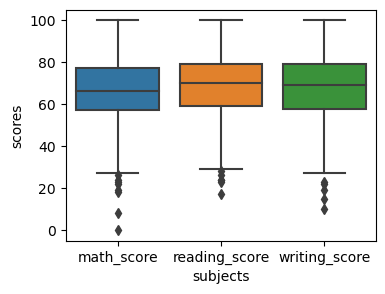

In [105]:
plt.figure(figsize=(4,3))
sns.boxplot(x=df1.subjects, y=df1.scores)

### Ratio of Male and Female students. hint: #pie chart

In [112]:
df2=df.gender.value_counts()
df2

female    518
male      482
Name: gender, dtype: int64

([<matplotlib.patches.Wedge at 0x1d8cc5e9940>,
 [Text(-0.06217041096298424, 1.0982417038160106, 'female'),
  Text(0.06217041096298411, -1.0982417038160106, 'male')],
 [Text(-0.033911133252536856, 0.5990409293541875, '51%'),
  Text(0.033911133252536786, -0.5990409293541875, '48%')])

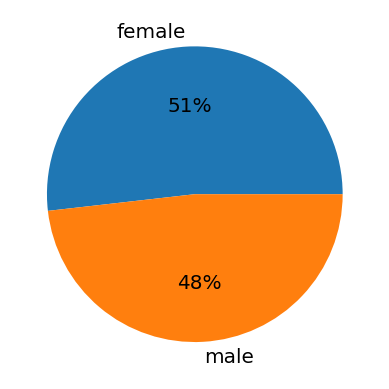

In [113]:
plt.pie(x=df2,labels=df2.index,autopct='%d%%',textprops={'size':'x-large'})

### Ratio of ethnicity of students. hint: # pie chart


In [114]:
df3=df.ethnicity.value_counts()
df3

group C    319
group D    262
group B    190
group E    140
group A     89
Name: ethnicity, dtype: int64

([<matplotlib.patches.Wedge at 0x1d8cc4c7040>,
 [Text(0.592324332246979, 0.9269044640242977, 'group C'),
  Text(-1.0461621742897658, 0.3399186742226879, 'group D'),
  Text(-0.49322154359063347, -0.9832255636109514, 'group B'),
  Text(0.5952333666001212, -0.9250390474384775, 'group E'),
  Text(1.057281962489778, -0.3035701760610943, 'group A')],
 [Text(0.3230859994074431, 0.5055842531041623, '31%'),
  Text(-0.5706339132489631, 0.18541018593964795, '26%'),
  Text(-0.2690299328676182, -0.5363048528787007, '18%'),
  Text(0.32467274541824787, -0.5045667531482604, '14%'),
  Text(0.5766992522671516, -0.1655837323969605, '8%')])

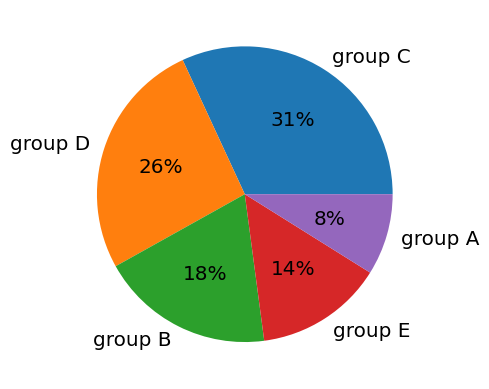

In [115]:
plt.pie(x=df3,labels=df3.index,autopct='%d%%',textprops={'size':'x-large'})

###  On an average which group performed the best in total marks? hint: group by then pivot table (col = gen, index= eth, val = total)

In [117]:
pivot_table = df.pivot_table(index="ethnicity", columns="gender", values="total_marks", aggfunc="mean")
pivot_table

gender,female,male
ethnicity,,
group A,195.388889,184.622642
group B,202.528846,189.000000
group C,205.755556,195.748201
group D,214.317829,200.962406
group E,222.188406,214.436620


### Which gender perfomed better overall? hint: #bar plot

<AxesSubplot:xlabel='gender', ylabel='total_marks'>

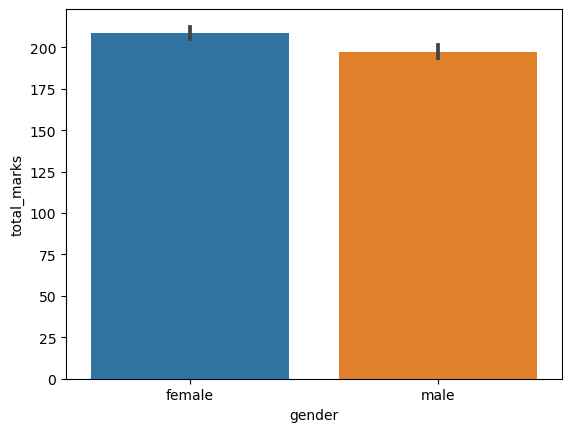

In [119]:
sns.barplot(data=df,x='gender',y='total_marks')

### Which gender performed better in each group?  hint: #bar

<AxesSubplot:xlabel='ethnicity', ylabel='total_marks'>

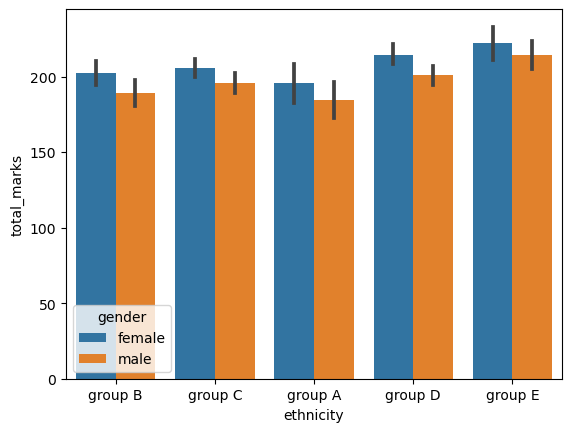

In [122]:
sns.barplot(data=df,x='ethnicity',y='total_marks',hue='gender')

### How many students have failed and which group have the most? 

In [125]:
df4=df[df.division=='Fail']
df4.ethnicity.value_counts()

group B    5
group C    3
group E    1
group A    1
Name: ethnicity, dtype: int64

### Students got more marks than others whose parents have higer education degree?

Text(0.5, 1.0, 'students got more marks than others whose parents have higer education degree')

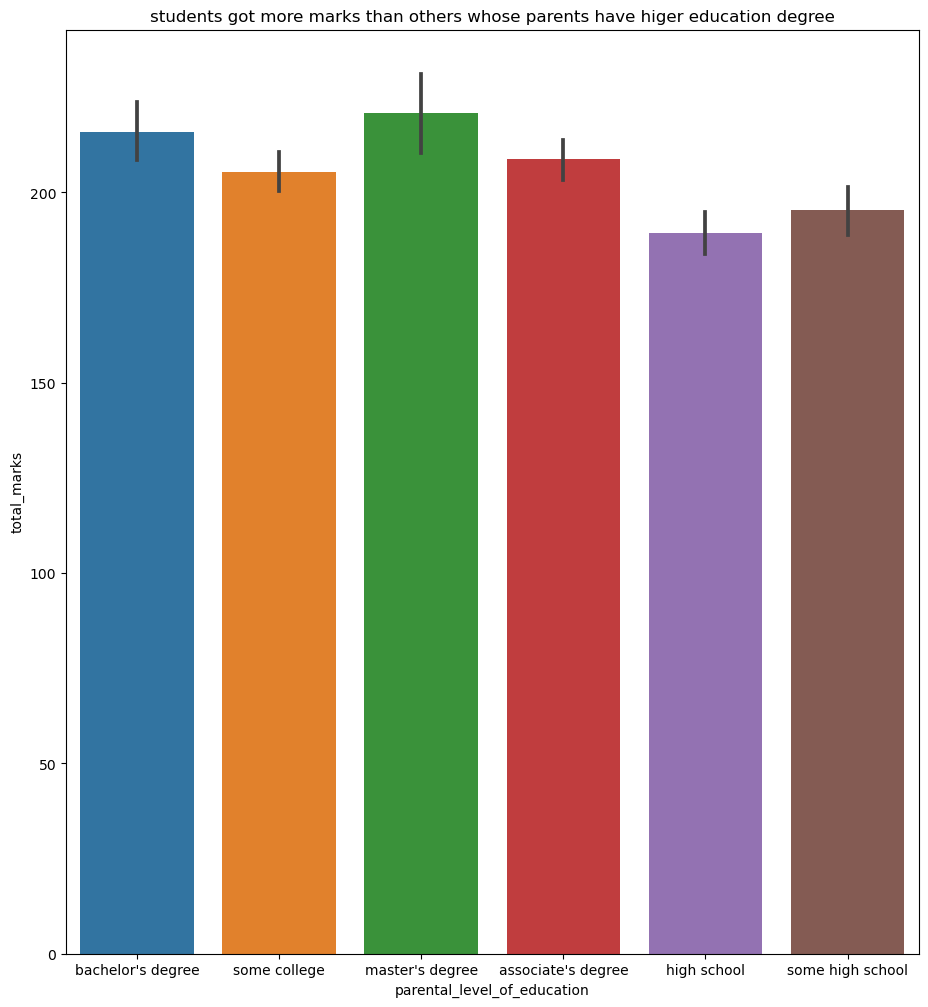

In [130]:
plt.figure(figsize=(11,12))
sns.barplot(data=df, x='parental_level_of_education', y='total_marks')
plt.title("students got more marks than others whose parents have higer education degree")

### Those students whose completed their course got more grades in compare to those student who didn't?

In [131]:
df5=df.test_preparation_course.value_counts()

In [132]:
df5

not completed    642
completed        358
Name: test_preparation_course, dtype: int64

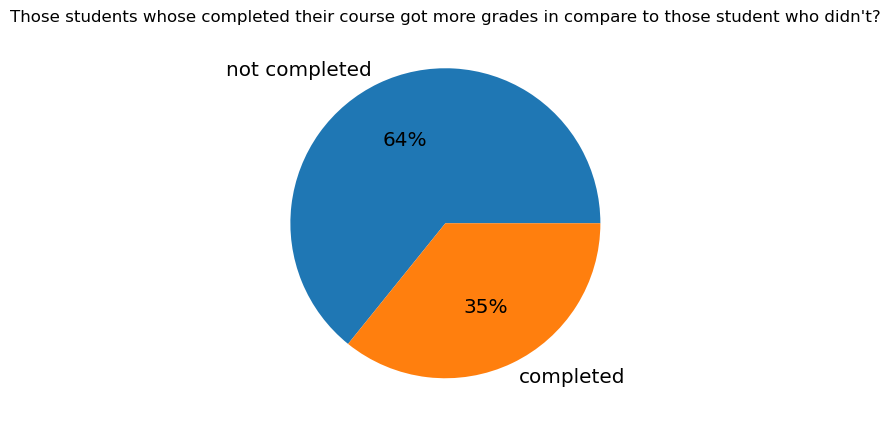

In [137]:
plt.figure(figsize=(5,6))
plt.pie(x=df5,labels=df5.index,autopct='%d%%',textprops={'size':'x-large'})
plt.title("Those students whose completed their course got more grades in compare to those student who didn't?")
plt.show()